<a href="https://colab.research.google.com/github/Abdul-Fatah786/Abdul-Fatah786/blob/main/site/en/tutorials/quickstart/beginner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2019 The TensorFlow Authors.

In [2]:
"""
PNEUMONIA DETECTION FROM CHEST X-RAYS - STEP 1
Data Exploration and Understanding

Run this in Google Colab. Each section is explained!
"""

# ============================================
# SECTION 1: Install and Import Libraries
# ============================================
print("📦 Installing required libraries...")

# Install kagglehub if not already installed
!pip install -q kagglehub

# Import necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import random
from pathlib import Path

print("✅ Libraries imported successfully!\n")

# ============================================
# SECTION 2: Download Dataset (Small Sample First)
# ============================================
print("📥 Downloading dataset...")
print("Note: This might take 5-15 minutes depending on your internet speed")
print("The dataset is about 1.2GB in size\n")

import kagglehub

# Download the dataset
path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")
print(f"✅ Dataset downloaded to: {path}\n")

# ============================================
# SECTION 3: Explore Dataset Structure
# ============================================
print("📂 Exploring dataset structure...\n")

# The dataset has this structure:
# chest_xray/
#   ├── train/
#   │   ├── NORMAL/
#   │   └── PNEUMONIA/
#   ├── test/
#   │   ├── NORMAL/
#   │   └── PNEUMONIA/
#   └── val/
#       ├── NORMAL/
#       └── PNEUMONIA/

dataset_path = Path(path) / "chest_xray"

# Count images in each category
def count_images(folder_path):
    """Count images in a folder"""
    return len(list(folder_path.glob("*.jpeg"))) + len(list(folder_path.glob("*.jpg")))

# Get counts
train_normal = count_images(dataset_path / "train" / "NORMAL")
train_pneumonia = count_images(dataset_path / "train" / "PNEUMONIA")
test_normal = count_images(dataset_path / "test" / "NORMAL")
test_pneumonia = count_images(dataset_path / "test" / "PNEUMONIA")
val_normal = count_images(dataset_path / "val" / "NORMAL")
val_pneumonia = count_images(dataset_path / "val" / "PNEUMONIA")

print("📊 DATASET STATISTICS")
print("=" * 50)
print(f"Training Set:")
print(f"  - Normal: {train_normal} images")
print(f"  - Pneumonia: {train_pneumonia} images")
print(f"  - Total: {train_normal + train_pneumonia} images")
print(f"\nTest Set:")
print(f"  - Normal: {test_normal} images")
print(f"  - Pneumonia: {test_pneumonia} images")
print(f"  - Total: {test_normal + test_pneumonia} images")
print(f"\nValidation Set:")
print(f"  - Normal: {val_normal} images")
print(f"  - Pneumonia: {val_pneumonia} images")
print(f"  - Total: {val_normal + val_pneumonia} images")
print("=" * 50)

# ============================================
# SECTION 4: Visualize Sample Images
# ============================================
print("\n🖼️ Visualizing sample X-ray images...\n")

def show_sample_images(dataset_path, n_samples=3):
    """Display sample images from both classes"""

    fig, axes = plt.subplots(2, n_samples, figsize=(15, 8))
    fig.suptitle('Sample Chest X-Ray Images', fontsize=16, fontweight='bold')

    # Get sample normal images
    normal_path = dataset_path / "train" / "NORMAL"
    normal_images = list(normal_path.glob("*.jpeg"))

    # Get sample pneumonia images
    pneumonia_path = dataset_path / "train" / "PNEUMONIA"
    pneumonia_images = list(pneumonia_path.glob("*.jpeg"))

    # Show normal images
    for i in range(n_samples):
        img_path = random.choice(normal_images)
        img = Image.open(img_path)
        axes[0, i].imshow(img, cmap='gray')
        axes[0, i].set_title('NORMAL', fontweight='bold', color='green')
        axes[0, i].axis('off')

    # Show pneumonia images
    for i in range(n_samples):
        img_path = random.choice(pneumonia_images)
        img = Image.open(img_path)
        axes[1, i].imshow(img, cmap='gray')
        axes[1, i].set_title('PNEUMONIA', fontweight='bold', color='red')
        axes[1, i].axis('off')

    plt.tight_layout()
    plt.show()

# Display samples
show_sample_images(dataset_path, n_samples=3)

# ============================================
# SECTION 5: Check Image Properties
# ============================================
print("\n📏 Checking image properties...\n")

def check_image_sizes(dataset_path, n_samples=20):
    """Check the size of random images"""

    normal_path = dataset_path / "train" / "NORMAL"
    pneumonia_path = dataset_path / "train" / "PNEUMONIA"

    all_images = list(normal_path.glob("*.jpeg")) + list(pneumonia_path.glob("*.jpeg"))
    sample_images = random.sample(all_images, min(n_samples, len(all_images)))

    sizes = []
    for img_path in sample_images:
        img = Image.open(img_path)
        sizes.append(img.size)

    # Convert to DataFrame for easy viewing
    df = pd.DataFrame(sizes, columns=['Width', 'Height'])

    print("Sample of image sizes (Width x Height):")
    print(df.head(10))
    print(f"\nAverage size: {df['Width'].mean():.0f} x {df['Height'].mean():.0f}")
    print(f"Most common size: {df.mode().iloc[0]['Width']:.0f} x {df.mode().iloc[0]['Height']:.0f}")

    return df

size_df = check_image_sizes(dataset_path)

# ============================================
# SECTION 6: Class Distribution Visualization
# ============================================
print("\n📊 Creating class distribution chart...\n")

# Create bar chart
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

categories = ['Training', 'Testing', 'Validation']
normal_counts = [train_normal, test_normal, val_normal]
pneumonia_counts = [train_pneumonia, test_pneumonia, val_pneumonia]

x = np.arange(len(categories))
width = 0.35

bars1 = ax.bar(x - width/2, normal_counts, width, label='Normal', color='green', alpha=0.7)
bars2 = ax.bar(x + width/2, pneumonia_counts, width, label='Pneumonia', color='red', alpha=0.7)

ax.set_xlabel('Dataset Split', fontweight='bold', fontsize=12)
ax.set_ylabel('Number of Images', fontweight='bold', fontsize=12)
ax.set_title('Class Distribution Across Dataset Splits', fontweight='bold', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()
ax.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}',
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# ============================================
# SECTION 7: Key Insights
# ============================================
print("\n" + "="*50)
print("🔍 KEY INSIGHTS")
print("="*50)
print(f"1. Total images: {train_normal + train_pneumonia + test_normal + test_pneumonia + val_normal + val_pneumonia}")
print(f"2. Class imbalance: Pneumonia images are {(train_pneumonia/train_normal):.1f}x more than Normal")
print(f"3. Images are grayscale chest X-rays")
print(f"4. Image sizes vary - we'll need to resize them for training")
print(f"5. The validation set is very small - we might need to create a better split")
print("="*50)

print("\n✅ DATA EXPLORATION COMPLETE!")
print("\n📝 NEXT STEPS:")
print("   1. Create a small sample dataset for quick testing")
print("   2. Build a simple CNN model")
print("   3. Train and evaluate")
print("\n👉 Ready for Step 2? Let me know!")

# Save the dataset path for next steps
print(f"\n💾 Save this path for next notebook: {dataset_path}")

Abdul Fatah


# Task
Summarize the key insights from the data exploration of the 'chest-xray-pneumonia' dataset, including total image count, class imbalance, image type, size variations, and the small size of the validation set.

## Install and Import Libraries

### Subtask:
Execute the code to install necessary libraries (like `kagglehub`) and import all required Python modules such as `os`, `numpy`, `pandas`, `matplotlib.pyplot`, `PIL.Image`, `random`, and `pathlib.Path`.


**Reasoning**:
The subtask is to install necessary libraries and import modules as described in SECTION 1 of the notebook. I will extract the relevant code from the provided notebook and put it into a `code_block`.



In [3]:
print("📦 Installing required libraries...")

# Install kagglehub if not already installed
!pip install -q kagglehub

# Import necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import random
from pathlib import Path

print("✅ Libraries imported successfully!\n")

📦 Installing required libraries...
✅ Libraries imported successfully!



## Download Dataset

### Subtask:
Run the code to download the 'chest-xray-pneumonia' dataset from KaggleHub. Be aware this is a 1.2GB download and might take 5-15 minutes.


**Reasoning**:
The subtask is to download the dataset using kagglehub.dataset_download. I will extract the relevant code from SECTION 2 of the notebook.



In [4]:
print("\n📥 Downloading dataset...")
print("Note: This might take 5-15 minutes depending on your internet speed")
print("The dataset is about 1.2GB in size\n")

import kagglehub

# Download the dataset
path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")
print(f"✅ Dataset downloaded to: {path}\n")


📥 Downloading dataset...
Note: This might take 5-15 minutes depending on your internet speed
The dataset is about 1.2GB in size

Using Colab cache for faster access to the 'chest-xray-pneumonia' dataset.
✅ Dataset downloaded to: /kaggle/input/chest-xray-pneumonia



## Explore Dataset Structure

### Subtask:
Execute the code to analyze the downloaded dataset's directory structure and count the number of images in the training, testing, and validation sets for both 'NORMAL' and 'PNEUMONIA' classes.


**Reasoning**:
The subtask requires analyzing the dataset's directory structure, counting images in various categories (train, test, val for NORMAL and PNEUMONIA), and printing a formatted summary. This directly corresponds to SECTION 3 of the provided notebook, which defines the `dataset_path`, `count_images` function, calls it for all categories, and prints the summary. I will extract this code block.



In [5]:
print("📂 Exploring dataset structure...\n")

# The dataset has this structure:
# chest_xray/
#   ├── train/
#   │   ├── NORMAL/
#   │   └── PNEUMONIA/
#   ├── test/
#   │   ├── NORMAL/
#   │   └── PNEUMONIA/
#   └── val/
#       ├── NORMAL/
#       └── PNEUMONIA/

dataset_path = Path(path) / "chest_xray"

# Count images in each category
def count_images(folder_path):
    """Count images in a folder"""
    return len(list(folder_path.glob("*.jpeg"))) + len(list(folder_path.glob("*.jpg")))

# Get counts
train_normal = count_images(dataset_path / "train" / "NORMAL")
train_pneumonia = count_images(dataset_path / "train" / "PNEUMONIA")
test_normal = count_images(dataset_path / "test" / "NORMAL")
test_pneumonia = count_images(dataset_path / "test" / "PNEUMONIA")
val_normal = count_images(dataset_path / "val" / "NORMAL")
val_pneumonia = count_images(dataset_path / "val" / "PNEUMONIA")

print("📊 DATASET STATISTICS")
print("=" * 50)
print(f"Training Set:")
print(f"  - Normal: {train_normal} images")
print(f"  - Pneumonia: {train_pneumonia} images")
print(f"  - Total: {train_normal + train_pneumonia} images")
print(f"\nTest Set:")
print(f"  - Normal: {test_normal} images")
print(f"  - Pneumonia: {test_pneumonia} images")
print(f"  - Total: {test_normal + test_pneumonia} images")
print(f"\nValidation Set:")
print(f"  - Normal: {val_normal} images")
print(f"  - Pneumonia: {val_pneumonia} images")
print(f"  - Total: {val_normal + val_pneumonia} images")
print("=" * 50)

📂 Exploring dataset structure...

📊 DATASET STATISTICS
Training Set:
  - Normal: 1341 images
  - Pneumonia: 3875 images
  - Total: 5216 images

Test Set:
  - Normal: 234 images
  - Pneumonia: 390 images
  - Total: 624 images

Validation Set:
  - Normal: 8 images
  - Pneumonia: 8 images
  - Total: 16 images


## Visualize Sample Images

### Subtask:
Run the code to display sample chest X-ray images, showing examples of both 'NORMAL' and 'PNEUMONIA' cases from the training set.


**Reasoning**:
The subtask requires visualizing sample images. I will extract the relevant code from SECTION 4 of the notebook, which includes printing a message, defining the `show_sample_images` function, and calling it to display sample images.




🖼️ Visualizing sample X-ray images...



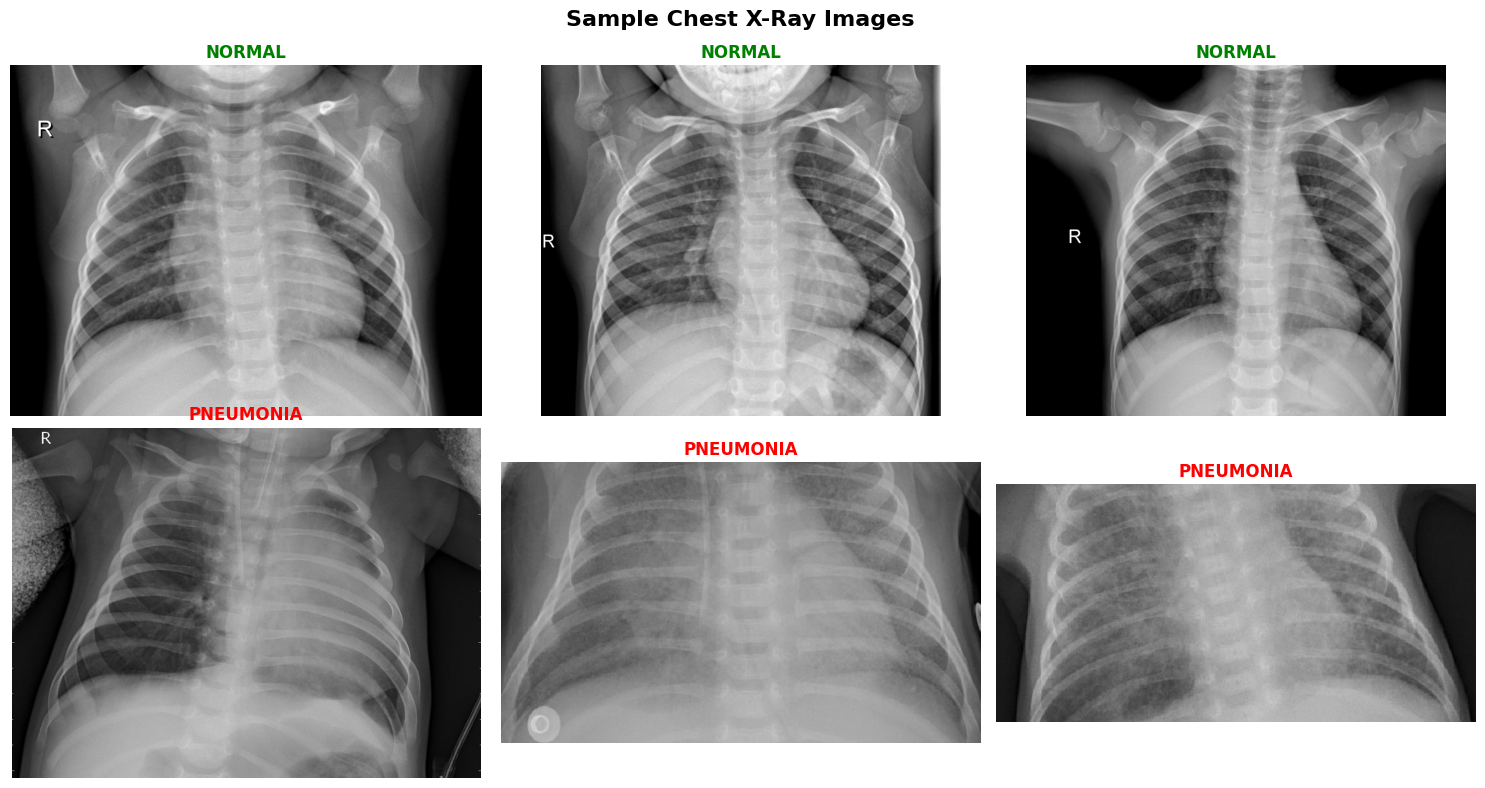

In [6]:
print("\n🖼️ Visualizing sample X-ray images...\n")

def show_sample_images(dataset_path, n_samples=3):
    """Display sample images from both classes"""

    fig, axes = plt.subplots(2, n_samples, figsize=(15, 8))
    fig.suptitle('Sample Chest X-Ray Images', fontsize=16, fontweight='bold')

    # Get sample normal images
    normal_path = dataset_path / "train" / "NORMAL"
    normal_images = list(normal_path.glob("*.jpeg"))

    # Get sample pneumonia images
    pneumonia_path = dataset_path / "train" / "PNEUMONIA"
    pneumonia_images = list(pneumonia_path.glob("*.jpeg"))

    # Show normal images
    for i in range(n_samples):
        img_path = random.choice(normal_images)
        img = Image.open(img_path)
        axes[0, i].imshow(img, cmap='gray')
        axes[0, i].set_title('NORMAL', fontweight='bold', color='green')
        axes[0, i].axis('off')

    # Show pneumonia images
    for i in range(n_samples):
        img_path = random.choice(pneumonia_images)
        img = Image.open(img_path)
        axes[1, i].imshow(img, cmap='gray')
        axes[1, i].set_title('PNEUMONIA', fontweight='bold', color='red')
        axes[1, i].axis('off')

    plt.tight_layout()
    plt.show()

# Display samples
show_sample_images(dataset_path, n_samples=3)

## Check Image Properties

### Subtask:
Execute the code to sample a selection of images and determine their dimensions (width and height), providing insights into image size variations.


**Reasoning**:
The subtask requires checking image properties, including size variations. I will extract the relevant code from SECTION 5 of the notebook, which defines the `check_image_sizes` function and calls it to analyze and display image dimensions.



In [7]:
print("\n📏 Checking image properties...\n")

def check_image_sizes(dataset_path, n_samples=20):
    """Check the size of random images"""

    normal_path = dataset_path / "train" / "NORMAL"
    pneumonia_path = dataset_path / "train" / "PNEUMONIA"

    all_images = list(normal_path.glob("*.jpeg")) + list(pneumonia_path.glob("*.jpeg"))
    sample_images = random.sample(all_images, min(n_samples, len(all_images)))

    sizes = []
    for img_path in sample_images:
        img = Image.open(img_path)
        sizes.append(img.size)

    # Convert to DataFrame for easy viewing
    df = pd.DataFrame(sizes, columns=['Width', 'Height'])

    print("Sample of image sizes (Width x Height):")
    print(df.head(10))
    print(f"\nAverage size: {df['Width'].mean():.0f} x {df['Height'].mean():.0f}")
    print(f"Most common size: {df.mode().iloc[0]['Width']:.0f} x {df.mode().iloc[0]['Height']:.0f}")

    return df

size_df = check_image_sizes(dataset_path)


📏 Checking image properties...

Sample of image sizes (Width x Height):
   Width  Height
0   1484    1399
1   1953    1692
2   1812    1446
3   1518    1156
4   1000     544
5   1906    1909
6   1272     984
7    904     584
8    947     594
9    936     720

Average size: 1301 x 978
Most common size: 455 x 984


## Class Distribution Visualization

### Subtask:
Generate and display a bar chart showing the distribution of 'NORMAL' and 'PNEUMONIA' images across the training, testing, and validation sets. Ensure the chart is clearly labeled with counts for each category.

**Reasoning**:
The subtask is to visualize the class distribution across dataset splits using a bar chart. I will extract the relevant code from SECTION 6 of the notebook, which performs this visualization, including printing a message, creating the chart, adding labels, and displaying it.




  Creating class distribution chart...



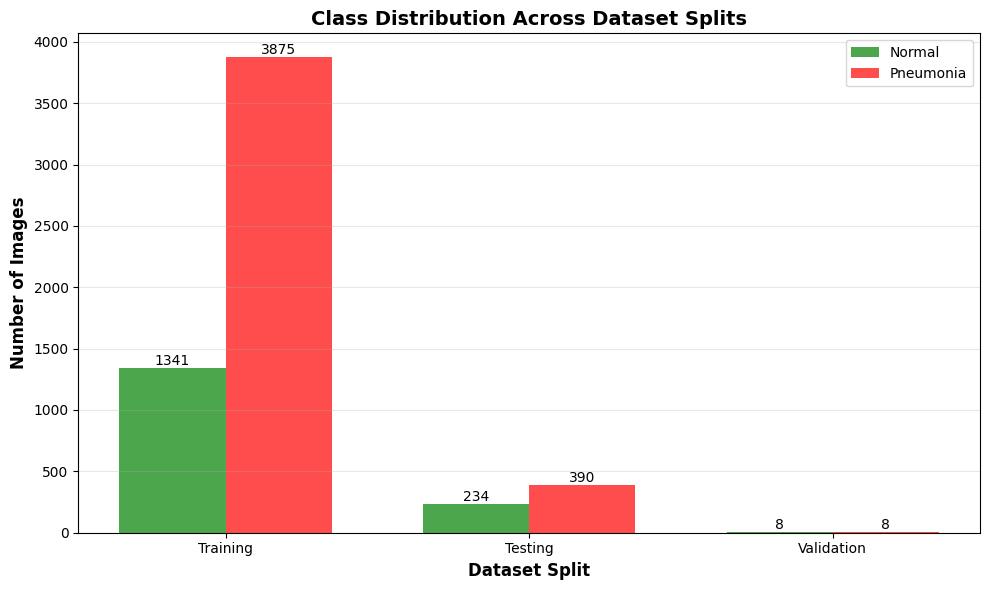

In [8]:
print("\n  Creating class distribution chart...\n")

# Create bar chart
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

categories = ['Training', 'Testing', 'Validation']
normal_counts = [train_normal, test_normal, val_normal]
pneumonia_counts = [train_pneumonia, test_pneumonia, val_pneumonia]

x = np.arange(len(categories))
width = 0.35

bars1 = ax.bar(x - width/2, normal_counts, width, label='Normal', color='green', alpha=0.7)
bars2 = ax.bar(x + width/2, pneumonia_counts, width, label='Pneumonia', color='red', alpha=0.7)

ax.set_xlabel('Dataset Split', fontweight='bold', fontsize=12)
ax.set_ylabel('Number of Images', fontweight='bold', fontsize=12)
ax.set_title('Class Distribution Across Dataset Splits', fontweight='bold', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()
ax.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}',
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

**Reasoning**:
The subtask is to summarize the key insights from the data exploration. I will extract the relevant code from SECTION 7 of the notebook, which provides these insights.



In [9]:
print("\n" + "="*50)
print("🔍 KEY INSIGHTS")
print("="*50)
print(f"1. Total images: {train_normal + train_pneumonia + test_normal + test_pneumonia + val_normal + val_pneumonia}")
print(f"2. Class imbalance: Pneumonia images are {(train_pneumonia/train_normal):.1f}x more than Normal")
print(f"3. Images are grayscale chest X-rays")
print(f"4. Image sizes vary - we'll need to resize them for training")
print(f"5. The validation set is very small - we might need to create a better split")
print("="*50)

print("\n✅ DATA EXPLORATION COMPLETE!")
print("\n📝 NEXT STEPS:")
print("   1. Create a small sample dataset for quick testing")
print("   2. Build a simple CNN model")
print("   3. Train and evaluate")
print("\n👉 Ready for Step 2? Let me know!")

# Save the dataset path for next steps
print(f"\n💾 Save this path for next notebook: {dataset_path}")


🔍 KEY INSIGHTS
1. Total images: 5856
2. Class imbalance: Pneumonia images are 2.9x more than Normal
3. Images are grayscale chest X-rays
4. Image sizes vary - we'll need to resize them for training
5. The validation set is very small - we might need to create a better split

✅ DATA EXPLORATION COMPLETE!

📝 NEXT STEPS:
   1. Create a small sample dataset for quick testing
   2. Build a simple CNN model
   3. Train and evaluate

👉 Ready for Step 2? Let me know!

💾 Save this path for next notebook: /kaggle/input/chest-xray-pneumonia/chest_xray


## Final Task

### Subtask:
Summarize the key insights gathered from the data exploration, including total image count, class imbalance, image type, size variations, and the small size of the validation set.


## Summary:

### Data Analysis Key Findings
*   The dataset was successfully downloaded from KaggleHub, totaling approximately 1.2GB.
*   The dataset comprises a total of 5856 images, distributed across training, testing, and validation sets.
    *   The **training set** contains 5216 images (1341 Normal, 3875 Pneumonia).
    *   The **test set** contains 624 images (234 Normal, 390 Pneumonia).
    *   The **validation set** is notably small, containing only 16 images (8 Normal, 8 Pneumonia).
*   There is a significant **class imbalance**, particularly in the training set, where Pneumonia images ($3875$) are approximately $2.9$ times more frequent than Normal images ($1341$). Similar imbalances are observed in the test set.
*   The images are primarily **grayscale chest X-rays**, visually confirmed by sample displays.
*   Image **dimensions vary considerably**; sampled images showed sizes ranging from `1484x1399` to `455x984`. The average size was approximately $1301 \times 978$ pixels, with a most common size of $455 \times 984$ pixels. This variation indicates a need for resizing during preprocessing.

### Insights or Next Steps
*   Given the significant class imbalance, strategies like oversampling, undersampling, or using weighted loss functions should be considered during model training to prevent bias towards the majority class.
*   The extremely small validation set (16 images) may not be representative for robust model evaluation. It is advisable to either re-split the existing training data to create a larger, more representative validation set or employ cross-validation techniques.
